## Business Objective/Problem
- Bơ 'Hass', một công ty có trụ sở tại Mexico, sản xuất nhiều loại bơ được bán ở Mỹ. Họ đã rất thành công trong những năm gần đây và muốn mở rộng. Vì vậy, họ muốn xay dựng mô hình hợp lý để dự đoán giá trung bình của bơ 'Hass' ở Mỹ nhằm xem xét việc mở rộng các loại trang trại Bơ đang có cho việc trồng bơ ở các vùng khác.

## Triển khai dự án

### Bước 1: Business Understanding
- Hiện tại, công ty kinh doanh quả bơ ở rất nhiều vùng của nước Mỹ với 2 loại bơ là bơ thường và bơ hữu cơ, được đóng gói theo nhiều quy chuẩn (Small/Large/XLarge Bags), và có 3 PLU (Product Look Up) khác nhau (4046, 4225, 4770). Nhưng họ chưa có mô hình để dự đoán giá bơ cho việc mở rộng.
- Mục tiêu/ Vấn đề: Xây dựng mô hình dự đoán giá trung bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất, kinh doanh.

### Bước 2: Data Understanding
Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ liệu mà công ty đang có:
- Dữ liệu được lấy trực tiếp từ máy tính tiền của các nhà bán lẻ dựa trên doanh số bán lẻ thực tế của bơ Hass.
- Dữ liệu đại diện cho dữ liệu lấy từ máy quét bán lẻ hàng tuần cho lượng bán lẻ (National retail volume- units) và giá bơ từ tháng 4/2015 đến tháng 3/2018.  
- Giá Trung bình (Average Price) trong bảng phản ánh giá trên một đơn vị (mỗi quả bơ), ngay cả khi nhiều đơn vị (bơ) được bán trong bao.  
- Mã tra cứu sản phẩm - Product Lookup codes (PLU’s) trong bảng chỉ dành cho bơ Hass, không dành cho các sản phẩm khác.  

Toàn bộ dữ liệu được đổ ra và lưu trữ trong tập tin avocado.csv với 18249 record. Với các cột:
- Date - ngày ghi nhận
- AveragePrice – giá trung bình của một quả bơ
- Type - conventional / organic – loại: thông thường/ hữu cơ
- Region – vùng được bán
- Total Volume – tổng số bơ đã bán
- 4046 – tổng số bơ có mã PLU 4046 đã bán
- 4225 - tổng số bơ có mã PLU 4225 đã bán
- 4770 - tổng số bơ có mã PLU 4770 đã bán
- Total Bags – tổng số túi đã bán
- Small/Large/XLarge Bags – tổng số túi đã bán theo size  

Có hai loại bơ trong tập dữ liệu và một số vùng khác nhau. Điều này cho phép chúng ta thực hiện tất cả các loại phân tích cho các vùng khác nhau, hoặc phân tích toàn bộ nước Mỹ theo một trong hai loại bơ.  

=> Có thể tập trung giải quyết hai bài toán:
- Bài toán 1: USA’s Avocado AveragePrice Prediction – Sử dụng các thuật toán Regression như Linear Regression, Random Forest, XGB Regressor...  
- Bài toán 2: Conventional/Organic Avocado Average Price Prediction for the future in California/NewYork… - sử dụng các thuật toán Time Series như ARIMA, Prophet...  

### Bước 3: Data preparation/ Prepare
 Từ bước 3 trở đi cách triển khai cho hai bài toán sẽ khác nhau.

In [2]:
#!pip install pandas-profiling==2.7.1

In [3]:
#!pip install fbprophet

In [4]:
#!pip install pmdarima

In [5]:
#!pip install xgboost

In [6]:
#from google.colab import drive
#drive.mount("/content/gdrive", force_remount=True)

In [7]:
#%cd '/content/gdrive/MyDrive/LDS0_k271_HuynhKimTho/Project_1'

In [32]:
#Nhập các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%pylab inline
#matplotlib.matplotlib_fname()


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import pandas_profiling as pp

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor

import datetime
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy
from math import sqrt

from sklearn.feature_selection import SelectKBest, f_regression

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot



In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
pd.options.display.float_format = '{:.2f}'.format

In [11]:
#Đọc dữ liệu
data = pd.read_csv('avocado.csv')

In [12]:
#Xem thông tin tổng quát
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [13]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [14]:
#Bỏ đi cột 'Unnamed'
data = data.drop(data.columns[0],axis=1)

In [15]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


## Bài toán 2 - USA’s Avocado AveragePrice Prediction
Conventional/Organic Avocado Average Price Prediction for the future in California/NewYork… - sử dụng các thuật toán Time Series như ARIMA, Prophet...  

### Yêu cầu 4:
- Hãy chọn ra một vùng (trong danh sách các vùng hang bơ “Hass” đang kinh doanh) mà bạn cho rằng trong tương lai có thể mở rộng trồng trọt, sản xuất và kinh doanh (Organic và/ hoặc Conventional Avocado). Hãy chứng minh điều này bằng cách triển khai các bài toán như đã làm với vùng California.

### Tìm hiểu và khám phá dữ liệu - EDA
Đã trình bày cụ thể trong bài toán 1, nên trong bài toán 2 sẽ không thể hiện phần này.

### Khám phá chọn vùng cho bơ thường

In [52]:
temp_data = data.copy()

In [53]:
#Loại bỏ TotalUS - không phải tỉnh/vùng của USA
temp_data = temp_data[temp_data['region'] != 'TotalUS']
temp_data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [59]:
#Tính doanh số
temp_data['sales'] = temp_data['Total Volume'] * temp_data['AveragePrice']
temp_data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,sales
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,85434.70
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,74083.92
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,109944.80
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,85311.52
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,65330.69


In [138]:
#Lọc ra các tỉnh/vùng với doanh thu cao nhất đối với bơ thường
group_sales_c = temp_data[temp_data['type']=='conventional'].groupby('region').\
                                agg({'sales':'sum'}).sort_values('sales',ascending=False)
group_sales_c.head(10)

,sales
region,
California,1079637730.54
West,1011717817.52
Northeast,915993520.20
SouthCentral,850521946.72
Southeast,687508106.72
GreatLakes,656410800.27
Midsouth,586863438.54
LosAngeles,465447334.45
Plains,346074179.41


In [139]:
#Tính thành phần % của doanh số
group_sales_c['Percentage'] = round(group_sales_c['sales']/group_sales_c.sum()[0],3)*100
group_sales_c.head(10)

,sales,Percentage
region,,
California,1079637730.54,10.70
West,1011717817.52,10.00
Northeast,915993520.20,9.10
SouthCentral,850521946.72,8.40
Southeast,687508106.72,6.80
GreatLakes,656410800.27,6.50
Midsouth,586863438.54,5.80
LosAngeles,465447334.45,4.60
Plains,346074179.41,3.40


In [140]:
#Tính tỉ trọng top 5 so với tổng doanh số
group_sales_c.head(5).sum()

sales        4545379121.70
Percentage           45.00
dtype: float64

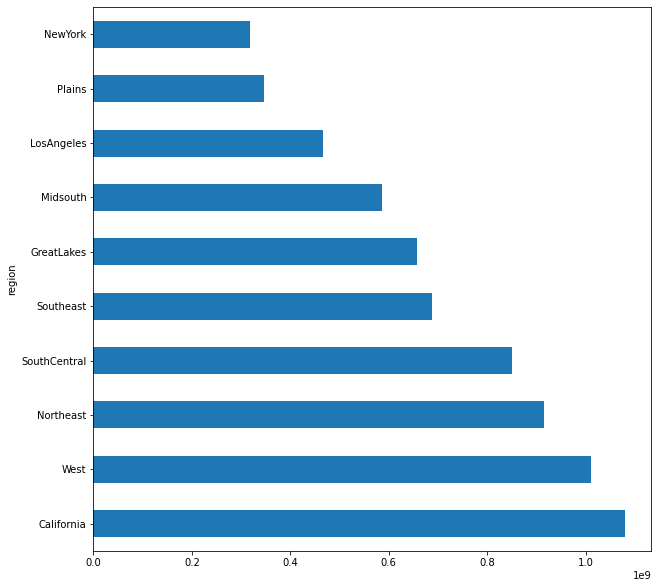

In [141]:
#Trực quan hóa top 10 tỉnh/vùng
plt.figure(figsize=(10,10))
group_sales_c['sales'].head(10).plot.barh()
plt.show()

In [142]:
#Lọc ra các tỉnh/vùng với số lượng cao nhất đối với bơ thường
group_volume_c = temp_data[temp_data['type']=='conventional'].groupby('region').\
                            agg({'Total Volume':'sum'}).sort_values('Total Volume',ascending=False)
group_volume_c.head(10)

,Total Volume
region,
West,1049360589.54
California,1003596841.06
SouthCentral,993161154.56
Northeast,689054813.47
Southeast,605198753.21
GreatLakes,567567862.00
LosAngeles,494510272.48
Midsouth,490368916.32
Plains,302912655.85


In [143]:
#Tính thành phần % của volume
group_volume_c['Percentage'] = round(group_volume_c['Total Volume']/group_volume_c.sum()[0],3)*100
group_volume_c.head(10)

,Total Volume,Percentage
region,,
West,1049360589.54,11.20
California,1003596841.06,10.70
SouthCentral,993161154.56,10.60
Northeast,689054813.47,7.30
Southeast,605198753.21,6.40
GreatLakes,567567862.00,6.00
LosAngeles,494510272.48,5.30
Midsouth,490368916.32,5.20
Plains,302912655.85,3.20


In [144]:
#Tính tỉ trọng top 5 so với tổng volume
group_volume_c.head(5).sum()

Total Volume   4340372151.84
Percentage             46.20
dtype: float64

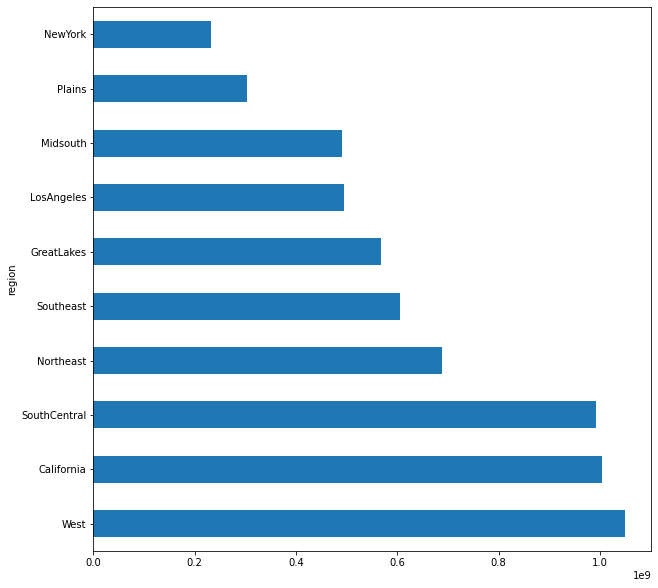

In [145]:
#Trực quan hóa top 10 tỉnh/vùng
plt.figure(figsize=(10,10))
group_volume_c['Total Volume'].head(10).plot.barh()
plt.show()

#### Nhận xét:
- Dựa vào các chỉ số và đồ thị của doanh số và số lượng qua các năm như trên, ta thấy 5 tỉnh/vùng cao nhất về cả hai chỉ tiêu này là: California, West, SouthCentral, Northeast và Southeast.
- Tỉ trọng của 5 tỉnh/vùng này chiếm tới 45% của tổng doanh số và 46.2% của tổng số lượng của cả nước Mỹ. Điều đó cho thấy đây là 5 vùng rất quan trọng, và ta có thể tập trung đẩy mạnh triển khai mở rộng kinh doanh cho 5 vùng này.
- Trong 5 vùng này, ta thấy 1 vùng khá tiềm năng để mở rộng phát triển kinh doanh là vùng Northeast. Northeast có số lượng chỉ chiếmkhoảng 7.3%, ít hơn khoảng 3% so với 3 vùng top đầu, nhưng doanh số lại rất tốt, đứng thứ 3 và doanh số chênh lệch không nhiều so với California và West. Vì vậy, nếu ta triển khai đẩy mạnh vùng Northeast này, thì trong tương lai Northeast cỏ thể đạt doanh số cao hơn (hoặc có thể là cao nhất) so với California và West.
- Do đó, ta sẽ chọn vùng Northeast này để phân tích cho bơ thường.

### Chọn vùng Northeast phân tích cho bơ thường

In [146]:
#Lọc ra vùng 'Northeast' và bơ hữu cơ 'organic'
temp_df = data[(data['region'] == 'Northeast') & (data['type'] == 'conventional')]
temp_df = temp_df.sort_values(by=['Date'], ascending=True)
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 1559 to 8826
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          169 non-null    object 
 1   AveragePrice  169 non-null    float64
 2   Total Volume  169 non-null    float64
 3   4046          169 non-null    float64
 4   4225          169 non-null    float64
 5   4770          169 non-null    float64
 6   Total Bags    169 non-null    float64
 7   Small Bags    169 non-null    float64
 8   Large Bags    169 non-null    float64
 9   XLarge Bags   169 non-null    float64
 10  type          169 non-null    object 
 11  year          169 non-null    int64  
 12  region        169 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 18.5+ KB


In [147]:
temp_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1559,2015-01-04,1.09,3759282.62,126640.65,2860709.93,7580.38,764351.66,669970.50,94381.16,0.00,conventional,2015,Northeast
1558,2015-01-11,1.28,3056024.77,97343.55,2070661.43,6915.47,881104.32,796190.93,84913.39,0.00,conventional,2015,Northeast
1557,2015-01-18,1.32,3066789.62,91803.09,2098784.32,7215.59,868986.62,784229.51,84757.11,0.00,conventional,2015,Northeast
1556,2015-01-25,1.27,3238501.89,96761.81,2129188.49,7923.65,1004627.94,903840.54,100787.40,0.00,conventional,2015,Northeast
1555,2015-02-01,1.23,4298883.17,133613.00,3149375.34,9191.41,1006703.42,896750.09,109953.33,0.00,conventional,2015,Northeast


In [148]:
temp_df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8830,2018-02-25,1.30,4525386.69,413430.69,2459409.32,7486.34,1645060.34,1357273.92,275551.97,12234.45,conventional,2018,Northeast
8829,2018-03-04,1.22,5318554.52,364721.28,3542626.10,6184.77,1405022.37,1101807.62,291485.87,11728.88,conventional,2018,Northeast
8828,2018-03-11,1.27,5214137.33,412621.66,3066433.39,6214.63,1728867.65,1436116.22,279239.21,13512.22,conventional,2018,Northeast
8827,2018-03-18,1.34,4621126.31,453731.61,2646866.44,7610.65,1512917.61,1210266.06,287448.21,15203.34,conventional,2018,Northeast
8826,2018-03-25,1.35,5134637.05,443927.42,2940789.85,6733.38,1743186.40,1495884.84,232372.83,14928.73,conventional,2018,Northeast


In [149]:
#Lấy thuộc tính 'Date' và 'AveragePrice'
df = temp_df[['Date','AveragePrice']]
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 1559 to 8826
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [150]:
#Reset lại index
df.reset_index(inplace=True)
df = df.drop('index', axis=1)
df.head()

,Date,AveragePrice
0,2015-01-04,1.09
1,2015-01-11,1.28
2,2015-01-18,1.32
3,2015-01-25,1.27
4,2015-02-01,1.23


In [151]:
df.tail()

,Date,AveragePrice
164,2018-02-25,1.30
165,2018-03-04,1.22
166,2018-03-11,1.27
167,2018-03-18,1.34
168,2018-03-25,1.35


#### Sử dụng thuật toán Facebook Prophet

In [152]:
#Tạo 1 bộ dữ liệu mới, không sử dụng bộ dữ liệu gốc
df_pf = df.copy()

In [153]:
df_pf.columns = ['ds','y']
df_pf.y = df_pf.y.astype(float)
df_pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      169 non-null    datetime64[ns]
 1   y       169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


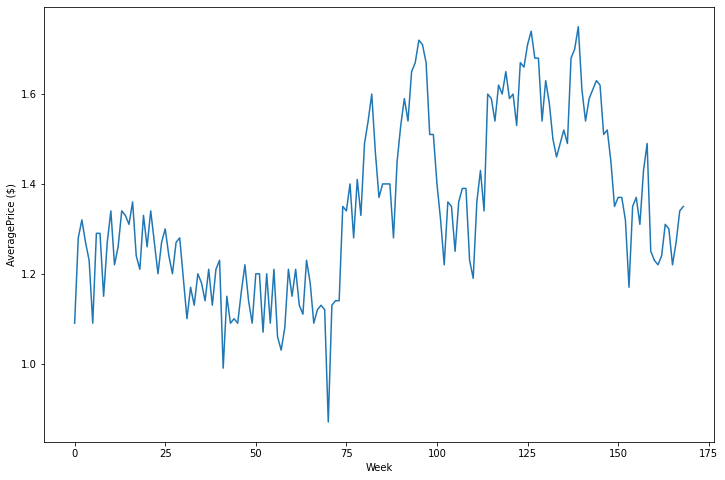

In [154]:
#Trực quan hóa
plt.figure(figsize=(12,8))
plt.plot(df_pf.y)
plt.xlabel('Week')
plt.ylabel('AveragePrice ($)')
plt.show()

In [155]:
#Chia bộ dữ liệu train và test theo tỉ lể 80:20
train = df_pf.iloc[df_pf.index[0:int(len(df_pf)*0.8)],:]
train.tail()

,ds,y
130,2017-07-02,1.63
131,2017-07-09,1.58
132,2017-07-16,1.50
133,2017-07-23,1.46
134,2017-07-30,1.49


In [156]:
test = df_pf.iloc[df_pf.index[int(len(df_pf)*0.8):],:]
test.head()

,ds,y
135,2017-08-06,1.52
136,2017-08-13,1.49
137,2017-08-20,1.68
138,2017-08-27,1.70
139,2017-09-03,1.75


In [157]:
len(train), len(test)

(135, 34)

In [158]:
#Xây dựng model Prophet theo tuần 'weekly'
pf_model = Prophet(yearly_seasonality = True, \
               daily_seasonality=False, weekly_seasonality=False)

In [159]:
#Huấn luyện model
pf_model.fit(train)

In [160]:
#34 weeks in test and 16 weeks to predict new values
weeks = pd.date_range('2017-08-06','2018-07-15',
                      freq='W').strftime('%Y-%m-%d').tolist()
future = pd.DataFrame(weeks)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [161]:
#Use the model to make a forecast
forecast = pf_model.predict(future)

In [162]:
forecast[['ds','yhat']].head(10)

,ds,yhat
0,2017-08-06,1.67
1,2017-08-13,1.67
2,2017-08-20,1.67
3,2017-08-27,1.66
4,2017-09-03,1.66
5,2017-09-10,1.67
6,2017-09-17,1.70
7,2017-09-24,1.75
8,2017-10-01,1.79
9,2017-10-08,1.80


#### Đánh giá model

In [163]:
df_pf.y.mean()

1.344437869822485

In [164]:
test.y.mean()

1.4258823529411768

In [165]:
#Tính MAE
y_test = test['y'].values
y_pred = forecast['yhat'].values[:34]
mae_p = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' %mae_p)
print('Sai số của MAE so với dữ liệu test:', round(mae_p/test.y.mean()*100,2),'%')
print('Sai số của MAE so với all data:', round(mae_p/df_pf.y.mean()*100,2),'%')


MAE: 0.311
Sai số của MAE so với dữ liệu test: 21.79 %
Sai số của MAE so với all data: 23.11 %


In [166]:
#Tính RMSE
rmse_p = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' % rmse_p)
print('Sai số của RMSE so với dữ liệu test:', round(rmse_p/test.y.mean()*100,2),'%')
print('Sai số của RMSE so với all data:', round(rmse_p/df_pf.y.mean()*100,2),'%')

RMSE: 0.346
Sai số của RMSE so với dữ liệu test: 24.26 %
Sai số của RMSE so với all data: 25.73 %


#### Nhận xét:
- So với mean_test = 1.425, mae và rmse tính ra là 21.79% và 24.26%.
- So với mean all data = 1.344, mae và rmse tính ra là 23.11% và 25.73%.
- Sai số của mae và rmse là tương đối lớn, cho nên model theo fbprophet cần phải cải thiện thêm.

<AxesSubplot:xlabel='y', ylabel='Density'>

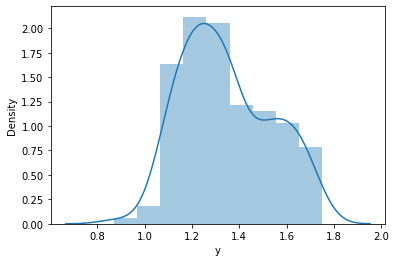

In [167]:
sns.distplot(df_pf.y)

In [168]:
y_test_value = pd.DataFrame(y_test, index = pd.to_datetime(test['ds']),columns=['Actual'])
y_pred_value = pd.DataFrame(y_pred, index = pd.to_datetime(test['ds']),columns=['Prediction'])

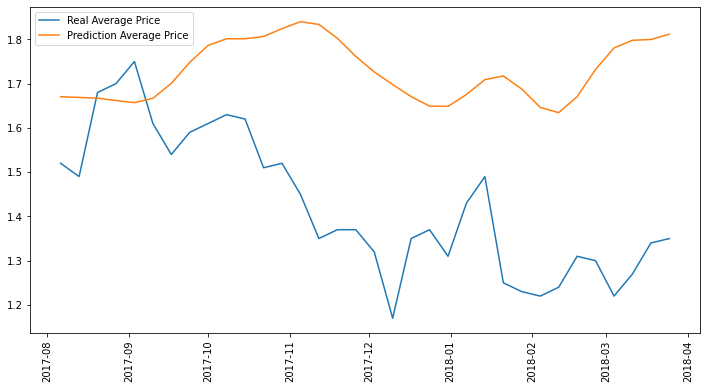

In [169]:
# Visulaize the result
plt.figure(figsize=(12,6))
plt.plot(y_test_value, label='Real Average Price')
plt.plot(y_pred_value, label='Prediction Average Price')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

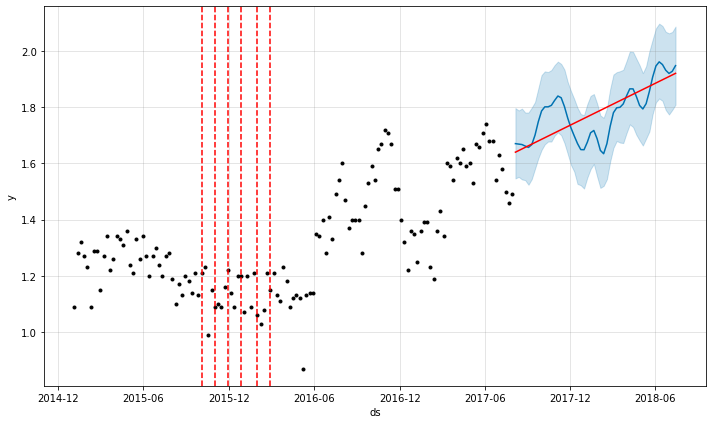

In [170]:
#Trực quan hóa
fig = pf_model.plot(forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(), pf_model, forecast)


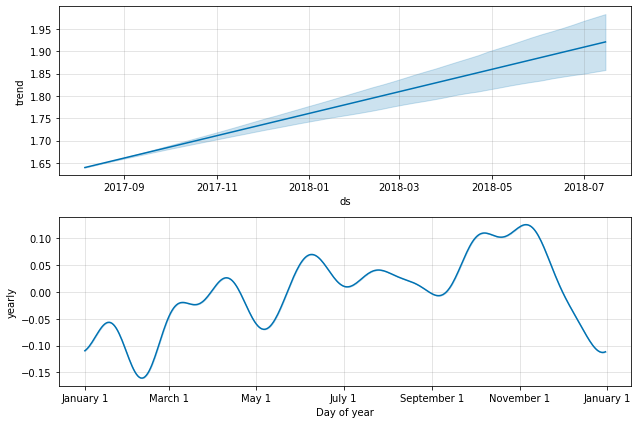

In [171]:
fig1 = pf_model.plot_components(forecast)
fig1.show()

#### Nhận xét:
- Dựa vào đồ thị, ta thấy giá dự đoán sẽ tăng trong khoảng các tháng tới của năm 2018.
- trong 1 năm, giá giảm nhiều nhất là vào khoảng gần giữa tháng 2, và tăng nhiều nhất vào tháng 11.

In [172]:
#Prediction for the next 16 weeks
forecast[['ds','yhat']].tail(16)

,ds,yhat
34,2018-04-01,1.84
35,2018-04-08,1.87
36,2018-04-15,1.87
37,2018-04-22,1.84
38,2018-04-29,1.81
39,2018-05-06,1.79
40,2018-05-13,1.81
41,2018-05-20,1.86
42,2018-05-27,1.91
43,2018-06-03,1.95


### Sử dụng ARIMA

In [175]:
#Tạo bộ dữ liệu cho phân tích theo ARIMA
df_ar = df.copy()
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [176]:
df_ar.head()

,Date,AveragePrice
0,2015-01-04,1.09
1,2015-01-11,1.28
2,2015-01-18,1.32
3,2015-01-25,1.27
4,2015-02-01,1.23


In [177]:
df_ar.index = df_ar.Date
df_ar = df_ar.drop('Date',axis=1)
df_ar.index = pd.to_datetime(df_ar.index)
df_ar.head()

,AveragePrice
Date,
2015-01-04,1.09
2015-01-11,1.28
2015-01-18,1.32
2015-01-25,1.27
2015-02-01,1.23


In [178]:
result = seasonal_decompose(df_ar, model ='multiplicative', freq = 52) # Theo tuần
result

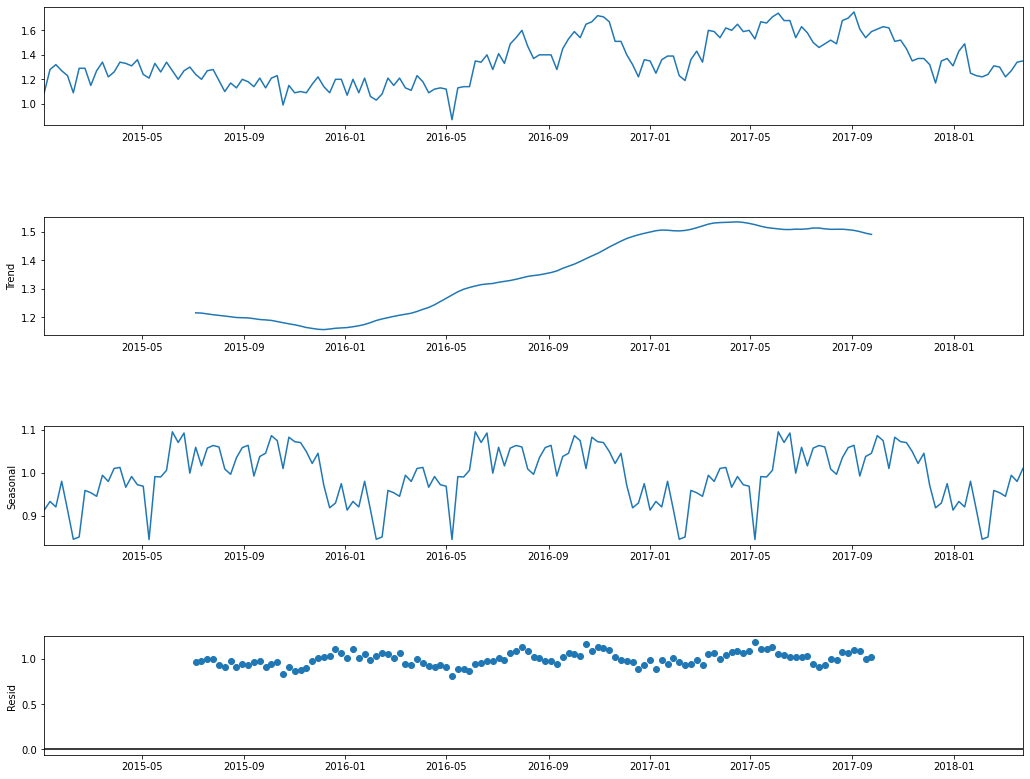

In [179]:
#Trực quan hóa
fig = result.plot()
fig.set_size_inches(16, 12)
plt.show()

#### Nhận xét:
- Dữ liệu có xu hướng tăng từ tháng 5/2016 đến tháng 9/2017
- Dữ liệu có xu hướng theo năm
- Dữ liệu phân bố tự nhiên độc lập

In [180]:
#Sử dụng auto_arima để tìm ra bộ thông số tối ưu - 'Seasonal' và theo tuần
stepwise_model = auto_arima(df_ar, start_p=2, start_q=2,
                            max_p=5, max_q=5,m=52, start_P=1, seasonal=True, d=1, D=1)

In [181]:
print(stepwise_model.aic())

-177.3084844599111


In [182]:
#Chia bộ dữ liệu train, test theo tỉ lệ 80:20
train_ar, test_ar = df_ar[0:int(len(df_ar)*0.8)], df_ar[int(len(df_ar)*0.8):]

In [183]:
test_ar.head()

,AveragePrice
Date,
2017-08-06,1.52
2017-08-13,1.49
2017-08-20,1.68
2017-08-27,1.70
2017-09-03,1.75


In [184]:
len(test_ar)

34

In [185]:
#Huấn luyện model
stepwise_model.fit(train_ar)

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 52),
      suppress_warnings=True, with_intercept=False)

In [186]:
#Dự đoán kết quả
future_forecast = stepwise_model.predict(n_periods=len(test_ar))

In [187]:
future_forecast

array([1.37525811, 1.36635866, 1.36058601, 1.40208847, 1.3889376 ,
       1.31697974, 1.42765594, 1.41246305, 1.48438427, 1.47598359,
       1.37805658, 1.48122347, 1.46588255, 1.46776162, 1.44558262,
       1.4222103 , 1.45785207, 1.36567301, 1.30349401, 1.3282407 ,
       1.38507623, 1.3037924 , 1.34041974, 1.31973272, 1.40319559,
       1.3140908 , 1.23131495, 1.24477783, 1.39101655, 1.3837924 ,
       1.38289719, 1.44092633, 1.42498602, 1.47597144])

In [188]:
#Chuyển thành DataFrame
future_forecast = pd.DataFrame(future_forecast,index = test_ar.index,columns=['Prediction'])
future_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2017-08-06 to 2018-03-25
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prediction  34 non-null     float64
dtypes: float64(1)
memory usage: 544.0 bytes


In [189]:
future_forecast.head()

,Prediction
Date,
2017-08-06,1.38
2017-08-13,1.37
2017-08-20,1.36
2017-08-27,1.40
2017-09-03,1.39


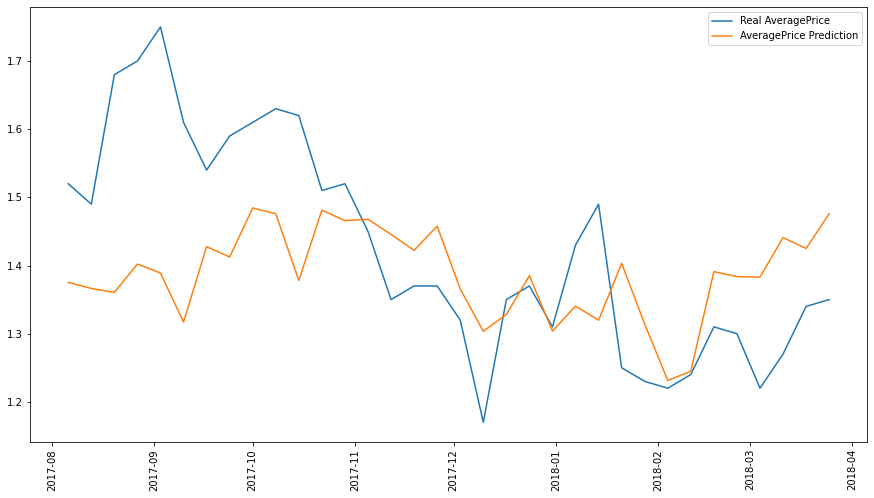

In [190]:
#Trực quan hóa so sánh giá trị thực và giá trị dự đoán của bộ test
plt.figure(figsize=(15,8))
plt.plot(test_ar, label='Real AveragePrice')
plt.plot(future_forecast, label='AveragePrice Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

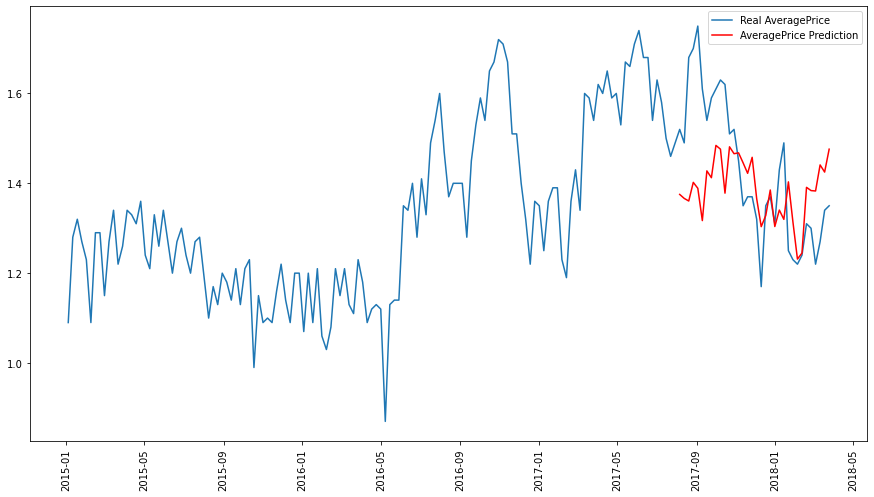

In [191]:
#Trực quan hóa toàn bộ dữ liệu với phần dự đoán
plt.figure(figsize=(15,8))
plt.plot(df_ar, label='Real AveragePrice')
plt.plot(future_forecast, label='AveragePrice Prediction',color='Red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [192]:
test_ar.mean()[0]

1.4258823529411768

In [193]:
df_ar.mean()[0]

1.344437869822485

In [194]:
#Tính MAE
mae = mean_absolute_error(test_ar, future_forecast[0:len(test_ar)])
print('MAE: %.3f' %mae)
print('Sai số của MAE so với dữ liệu test:', round(mae/test_ar.mean()[0]*100,2),'%')
print('Sai số của MAE so với all data:', round(mae/df_ar.mean()[0]*100,2),'%')

MAE: 0.122
Sai số của MAE so với dữ liệu test: 8.52 %
Sai số của MAE so với all data: 9.04 %


In [195]:
#Tính MAE
rmse = sqrt(mean_squared_error(test_ar, future_forecast[0:len(test_ar)]))
print('RMSE: %.3f' %rmse)
print('Sai số của RMSE so với dữ liệu test:', round(rmse/test_ar.mean()[0]*100,2),'%')
print('Sai số của RMSE so với all data:', round(rmse/df_ar.mean()[0]*100,2),'%')

RMSE: 0.152
Sai số của RMSE so với dữ liệu test: 10.69 %
Sai số của RMSE so với all data: 11.34 %


#### Nhận xét:
- So với mean_test = 1.425, mae và rmse tính ra là 8.52% và 10.69%, nhỏ hơn nhiều so với các giá trị tính theo prophet.  
- So với mean all data = 1.344, mae và rmse tính ra là 9.04% và 11.34%, nhỏ hơn nhiều so với các giá trị tính theo prophet.  
- Ta thấy sai số của mae và rmse khi tính theo ARIMA thì nhỏ hơn nhiều so với theo prophet. Tổng thể thì sai số mae và rmse theo arima là chấp nhận được. Cho nên ta có thể sử dụng model theo ARIMA sẽ chính xác hơn để dự đoán các giá trị tương lai.

In [196]:
#Dự đoán cho 16 tuần tiếp theo
future_forecast_new = stepwise_model.predict(n_periods=len(test_ar)+16) #34 tuần + 16 tuần cần dự đoán
future_forecast_new

array([1.37525811, 1.36635866, 1.36058601, 1.40208847, 1.3889376 ,
       1.31697974, 1.42765594, 1.41246305, 1.48438427, 1.47598359,
       1.37805658, 1.48122347, 1.46588255, 1.46776162, 1.44558262,
       1.4222103 , 1.45785207, 1.36567301, 1.30349401, 1.3282407 ,
       1.38507623, 1.3037924 , 1.34041974, 1.31973272, 1.40319559,
       1.3140908 , 1.23131495, 1.24477783, 1.39101655, 1.3837924 ,
       1.38289719, 1.44092633, 1.42498602, 1.47597144, 1.47874729,
       1.41716506, 1.45528442, 1.43686665, 1.43498602, 1.25806027,
       1.4693441 , 1.47122474, 1.49152314, 1.62844889, 1.59815048,
       1.6337924 , 1.50567304, 1.61943432, 1.55161336, 1.61418102])

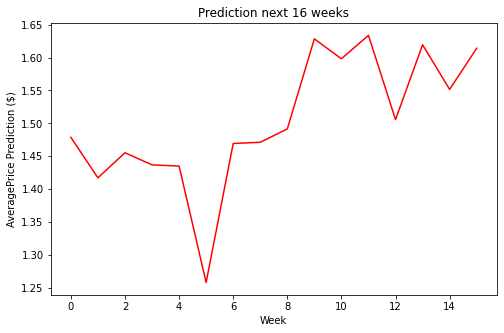

In [197]:
#Trực quan hóa xem dự đoán của các tuần trong tương lai
plt.figure(figsize=(8,5))
plt.plot(future_forecast_new[len(test_ar):], color='red')
plt.xlabel('Week')
plt.ylabel('AveragePrice Prediction ($)')
plt.title('Prediction next 16 weeks')
plt.show()

### Khám phá chọn vùng cho bơ hữu cơ

In [203]:
#Lọc ra các tỉnh/vùng với doanh thu cao nhất đối với bơ hữu cơ
group_sales_o = temp_data[temp_data['type']=='organic'].groupby('region').\
                                agg({'sales':'sum'}).sort_values('sales',ascending=False)
group_sales_o.head(10)

,sales
region,
West,55115838.53
Northeast,44014353.50
California,41776295.97
GreatLakes,32251044.00
Midsouth,28860400.45
SouthCentral,23537342.54
LosAngeles,18780275.96
NewYork,17595940.72
Southeast,16122474.32


In [204]:
#Tính thành phần % của doanh số
group_sales_o['Percentage'] = round(group_sales_o['sales']/group_sales_o.sum()[0],3)*100
group_sales_o.head(10)

,sales,Percentage
region,,
West,55115838.53,12.90
Northeast,44014353.50,10.30
California,41776295.97,9.80
GreatLakes,32251044.00,7.50
Midsouth,28860400.45,6.80
SouthCentral,23537342.54,5.50
LosAngeles,18780275.96,4.40
NewYork,17595940.72,4.10
Southeast,16122474.32,3.80


In [205]:
#Tính tỉ trọng top 5 so với tổng doanh số
group_sales_o.head(5).sum()

sales        202017932.44
Percentage          47.30
dtype: float64

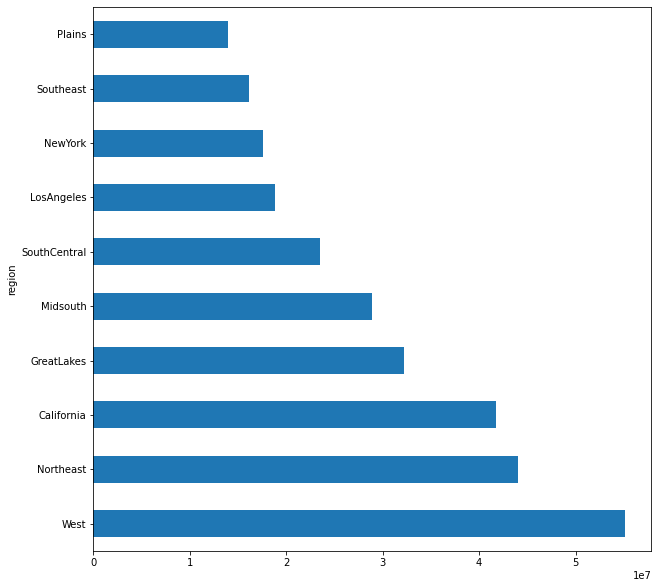

In [206]:
#Trực quan hóa top 10 tỉnh/vùng
plt.figure(figsize=(10,10))
group_sales_o['sales'].head(10).plot.barh()
plt.show()

In [208]:
#Lọc ra các tỉnh/vùng với số lượng cao nhất đối với bơ hữu cơ
group_volume_o = temp_data[temp_data['type']=='conventional'].groupby('region').\
                            agg({'Total Volume':'sum'}).sort_values('Total Volume',ascending=False)
group_volume_o.head(10)

,Total Volume
region,
West,1049360589.54
California,1003596841.06
SouthCentral,993161154.56
Northeast,689054813.47
Southeast,605198753.21
GreatLakes,567567862.00
LosAngeles,494510272.48
Midsouth,490368916.32
Plains,302912655.85


In [209]:
#Tính thành phần % của volume
group_volume_o['Percentage'] = round(group_volume_o['Total Volume']/group_volume_o.sum()[0],3)*100
group_volume_o.head(10)

,Total Volume,Percentage
region,,
West,1049360589.54,11.20
California,1003596841.06,10.70
SouthCentral,993161154.56,10.60
Northeast,689054813.47,7.30
Southeast,605198753.21,6.40
GreatLakes,567567862.00,6.00
LosAngeles,494510272.48,5.30
Midsouth,490368916.32,5.20
Plains,302912655.85,3.20


In [210]:
#Tính tỉ trọng top 5 so với tổng volume
group_volume_o.head(5).sum()

Total Volume   4340372151.84
Percentage             46.20
dtype: float64

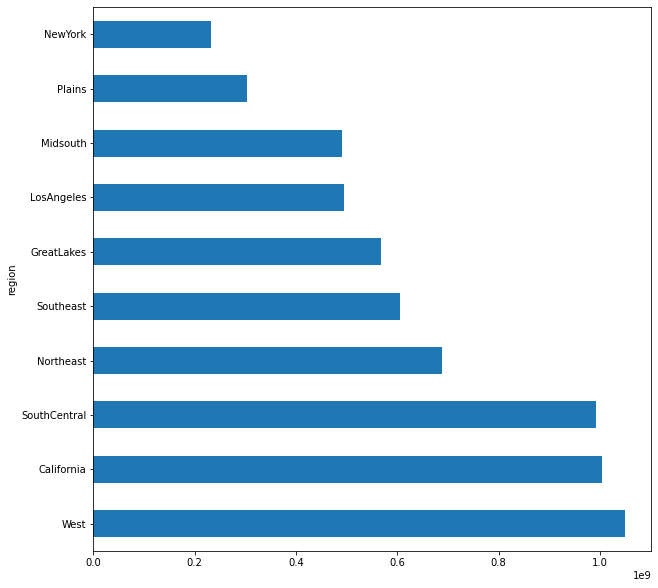

In [211]:
#Trực quan hóa top 10 tỉnh/vùng
plt.figure(figsize=(10,10))
group_volume_o['Total Volume'].head(10).plot.barh()
plt.show()

#### Nhận xét:
-Dựa vào chỉ số doanh số qua các năm như trên, ta thấy 5 tỉnh/vùng cao nhất là: West, Northeast, California, GreatLakes và Midsouth.   
-Dựa vào chỉ số sản lượng qua các năm như trên, ta thấy 5 tỉnh/vùng cao nhất là: West, California, SouthCentral, Northeast và Southeast.  
-Tỉ trọng của top 5 tỉnh/vùng đứng đầu chiếm tới 47.3% của tổng doanh số và 46.2% của tổng số lượng của cả nước Mỹ. Điều đó cho thấy đây là 5 vùng rất quan trọng, và ta có thể tập trung đẩy mạnh triển khai mở rộng kinh doanh cho 5 vùng này.  
-Trong 5 vùng này, ta thấy 1 vùng khá tiềm năng thú vị để mở rộng phát triển kinh doanh là vùng Northeast cho bơ hữu cơ. Northeast có số lượng chỉ chiếm khoảng 7.3%, đứng thứ 4 và ít hơn khoảng 3% so với 3 vùng top đầu, nhưng doanh số lại rất tốt và ấn tượng, đứng thứ 2 chỉ sau vùng West. Vì vậy, nếu ta triển khai đẩy mạnh vùng Northeast này, thì trong tương lai Northeast cỏ thể đạt doanh số cao hơn vùng West hoặc có thể là cao nhất.  
-Do đó, ta cũng sẽ chọn vùng Northeast này để phân tích cho bơ hữu cơ.

### Chọn vùng Northeast phân tích cho bơ hữu cơ

In [271]:
#Lọc ra vùng 'Northeast' và bơ hữu cơ 'organic'
temp_df1 = data[(data['region'] == 'Northeast') & (data['type'] == 'organic')]
temp_df1 = temp_df1.sort_values(by=['Date'], ascending=True)
temp_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 10685 to 17949
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          169 non-null    object 
 1   AveragePrice  169 non-null    float64
 2   Total Volume  169 non-null    float64
 3   4046          169 non-null    float64
 4   4225          169 non-null    float64
 5   4770          169 non-null    float64
 6   Total Bags    169 non-null    float64
 7   Small Bags    169 non-null    float64
 8   Large Bags    169 non-null    float64
 9   XLarge Bags   169 non-null    float64
 10  type          169 non-null    object 
 11  year          169 non-null    int64  
 12  region        169 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 18.5+ KB


In [272]:
temp_df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10685,2015-01-04,1.88,48280.46,4476.73,22389.09,23.15,21391.49,21379.79,11.70,0.00,organic,2015,Northeast
10684,2015-01-11,1.86,50079.81,3611.57,20043.89,65.93,26358.42,26332.17,26.25,0.00,organic,2015,Northeast
10683,2015-01-18,1.94,35304.15,1461.14,13317.36,73.50,20452.15,18457.10,1995.05,0.00,organic,2015,Northeast
10682,2015-01-25,1.92,40358.44,2519.17,17147.02,73.05,20619.20,20455.66,163.54,0.00,organic,2015,Northeast
10681,2015-02-01,1.78,63537.10,3278.92,23694.61,13.97,36549.60,36537.93,11.67,0.00,organic,2015,Northeast


In [273]:
temp_df1.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
17953,2018-02-25,1.63,303577.39,23250.65,66623.87,199.38,213503.49,193020.88,20482.61,0.00,organic,2018,Northeast
17952,2018-03-04,1.65,313200.35,38734.87,90401.71,108.65,183955.12,168196.82,15758.30,0.00,organic,2018,Northeast
17951,2018-03-11,1.76,288008.65,20619.84,53255.29,151.81,213981.71,185792.45,28189.26,0.00,organic,2018,Northeast
17950,2018-03-18,1.64,419607.75,61608.19,131261.94,53.54,226684.08,195973.16,30710.92,0.00,organic,2018,Northeast
17949,2018-03-25,1.58,374859.68,19823.16,58366.54,201.04,296468.94,265716.88,30752.06,0.00,organic,2018,Northeast


In [274]:
#Lấy thuộc tính 'Date' và 'AveragePrice'
df1 = temp_df1[['Date','AveragePrice']]
df1['Date'] = pd.to_datetime(df1['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 10685 to 17949
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [275]:
#Reset lại index
df1.reset_index(inplace=True)
df1 = df1.drop('index', axis=1)
df1.head()

,Date,AveragePrice
0,2015-01-04,1.88
1,2015-01-11,1.86
2,2015-01-18,1.94
3,2015-01-25,1.92
4,2015-02-01,1.78


In [276]:
df1.tail()

,Date,AveragePrice
164,2018-02-25,1.63
165,2018-03-04,1.65
166,2018-03-11,1.76
167,2018-03-18,1.64
168,2018-03-25,1.58


#### Sử dụng thuật toán Facebook Prophet

In [277]:
#Tạo 1 bộ dữ liệu mới, không sử dụng bộ dữ liệu gốc
df_pf1 = df1.copy()

In [278]:
df_pf1.columns = ['ds','y']
df_pf1.y = df_pf1.y.astype(float)
df_pf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      169 non-null    datetime64[ns]
 1   y       169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


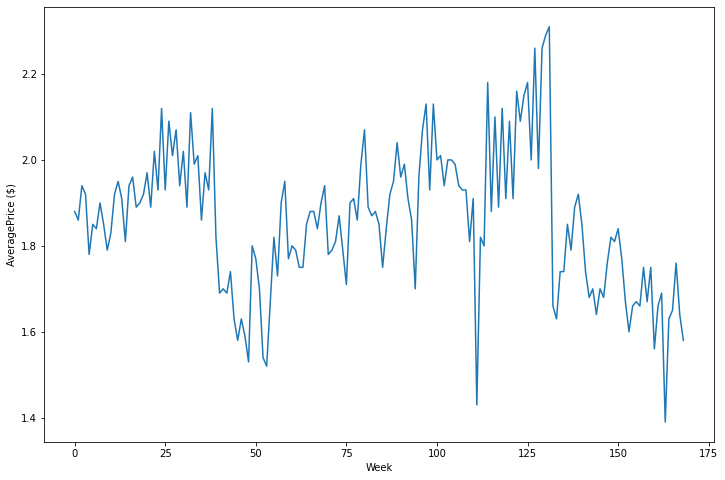

In [279]:
#Trực quan hóa
plt.figure(figsize=(12,8))
plt.plot(df_pf1.y)
plt.xlabel('Week')
plt.ylabel('AveragePrice ($)')
plt.show()

In [280]:
#Chia bộ dữ liệu train và test theo tỉ lể 80:20
train1 = df_pf1.iloc[df_pf1.index[0:int(len(df_pf1)*0.8)],:]
train1.tail()

,ds,y
130,2017-07-02,2.29
131,2017-07-09,2.31
132,2017-07-16,1.66
133,2017-07-23,1.63
134,2017-07-30,1.74


In [281]:
test1 = df_pf1.iloc[df_pf1.index[int(len(df_pf1)*0.8):],:]
test1.head()

,ds,y
135,2017-08-06,1.74
136,2017-08-13,1.85
137,2017-08-20,1.79
138,2017-08-27,1.89
139,2017-09-03,1.92


In [282]:
len(train1), len(test1)

(135, 34)

In [283]:
#Xây dựng model Prophet theo tuần 'weekly'
pf_model1 = Prophet(yearly_seasonality = True, \
               daily_seasonality=False, weekly_seasonality=False)

In [284]:
#Huấn luyện model
pf_model1.fit(train1)

In [285]:
#34 weeks in test and 16 weeks to predict new values
weeks1 = pd.date_range('2017-08-06','2018-07-15',
                      freq='W').strftime('%Y-%m-%d').tolist()
future1 = pd.DataFrame(weeks1)
future1.columns = ['ds']
future1['ds'] = pd.to_datetime(future1['ds'])

In [286]:
#Use the model to make a forecast
forecast1 = pf_model1.predict(future1)

In [287]:
forecast1[['ds','yhat']].head(10)

,ds,yhat
0,2017-08-06,2.03
1,2017-08-13,2.10
2,2017-08-20,2.11
3,2017-08-27,2.07
4,2017-09-03,2.05
5,2017-09-10,2.10
6,2017-09-17,2.18
7,2017-09-24,2.20
8,2017-10-01,2.13
9,2017-10-08,2.01


#### Đánh giá model

In [288]:
df_pf1.y.mean()

1.8594082840236688

In [289]:
test1.y.mean()

1.7108823529411765

In [290]:
#Tính MAE
y_test1 = test1['y'].values
y_pred1 = forecast1['yhat'].values[:34]
mae_p1 = mean_absolute_error(y_test1, y_pred1)
print('MAE: %.3f' %mae_p1)
print('Sai số của MAE so với dữ liệu test:', round(mae_p1/test1.y.mean()*100,2),'%')
print('Sai số của MAE so với all data:', round(mae_p1/df_pf1.y.mean()*100,2),'%')


MAE: 0.340
Sai số của MAE so với dữ liệu test: 19.88 %
Sai số của MAE so với all data: 18.29 %


In [291]:
#Tính RMSE
rmse_p1 = sqrt(mean_squared_error(y_test1, y_pred1))
print('RMSE: %.3f' % rmse_p1)
print('Sai số của RMSE so với dữ liệu test:', round(rmse_p1/test1.y.mean()*100,2),'%')
print('Sai số của RMSE so với all data:', round(rmse_p1/df_pf1.y.mean()*100,2),'%')

RMSE: 0.359
Sai số của RMSE so với dữ liệu test: 20.96 %
Sai số của RMSE so với all data: 19.29 %


#### Nhận xét:
- So với mean_test = 1.710, mae và rmse tính ra là 19.88% và 20.96%.
- So với mean all data = 1.859, mae và rmse tính ra là 18.29% và 19.29%.
- Sai số của mae và rmse là tương đối lớn, cho nên model theo fbprophet cần phải cải thiện thêm.

<AxesSubplot:xlabel='y', ylabel='Density'>

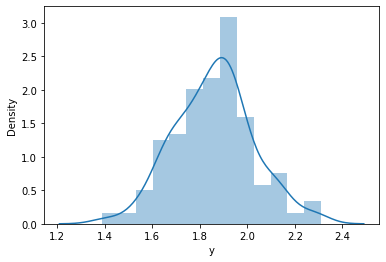

In [292]:
sns.distplot(df_pf1.y)

In [293]:
y_test_value1 = pd.DataFrame(y_test1, index = pd.to_datetime(test1['ds']),columns=['Actual'])
y_pred_value1 = pd.DataFrame(y_pred1, index = pd.to_datetime(test1['ds']),columns=['Prediction'])

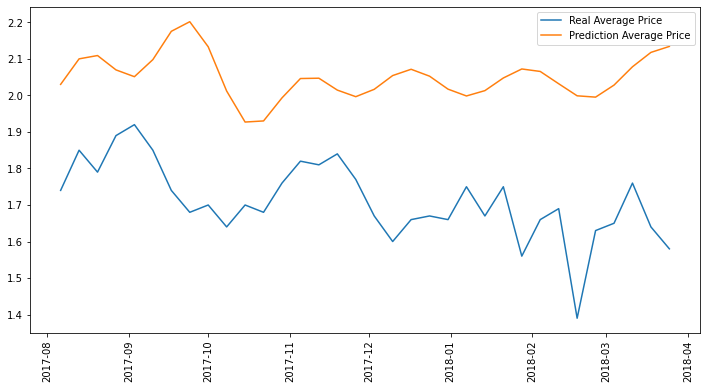

In [294]:
# Visulaize the result
plt.figure(figsize=(12,6))
plt.plot(y_test_value1, label='Real Average Price')
plt.plot(y_pred_value1, label='Prediction Average Price')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

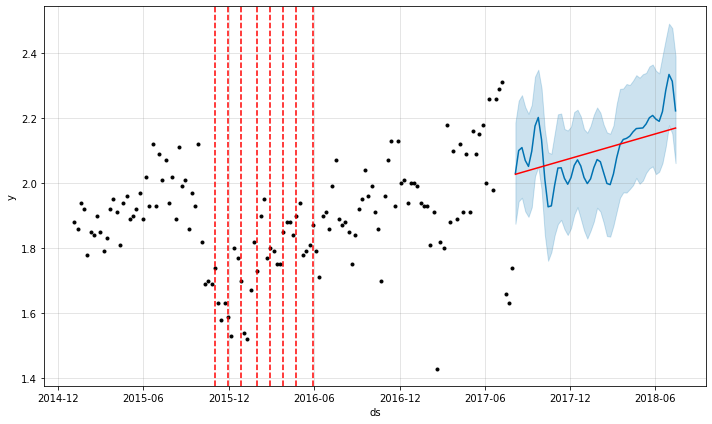

In [295]:
#Trực quan hóa
fig2 = pf_model1.plot(forecast1)
fig2.show()
a1 = add_changepoints_to_plot(fig2.gca(), pf_model1, forecast1)


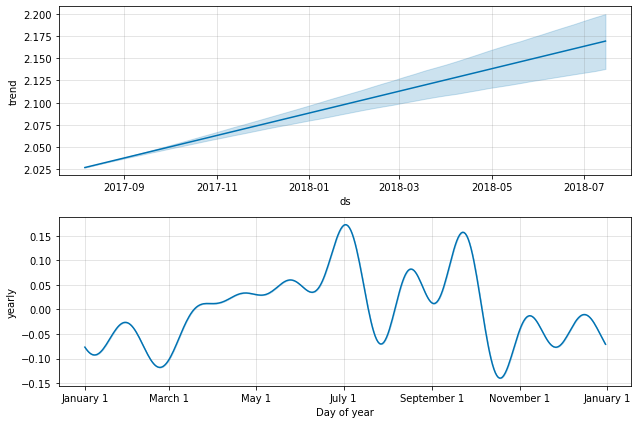

In [296]:
fig3 = pf_model1.plot_components(forecast1)
fig3.show()

#### Nhận xét:
- Dựa vào đồ thị, ta thấy giá dự đoán sẽ tăng trong khoảng các tháng tới của năm 2018.
- Trong 1 năm, giá giảm nhiều nhất là vào khoảng gần giữa tháng 10, và tăng nhiều nhất vào tháng 7.

In [297]:
#Prediction for the next 16 weeks
forecast1[['ds','yhat']].tail(16)

,ds,yhat
34,2018-04-01,2.14
35,2018-04-08,2.14
36,2018-04-15,2.16
37,2018-04-22,2.17
38,2018-04-29,2.17
39,2018-05-06,2.17
40,2018-05-13,2.18
41,2018-05-20,2.20
42,2018-05-27,2.21
43,2018-06-03,2.20


### Sử dụng ARIMA

In [300]:
#Tạo bộ dữ liệu cho phân tích theo ARIMA
df_ar1 = df1.copy()
df_ar1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [301]:
df_ar1.head()

,Date,AveragePrice
0,2015-01-04,1.88
1,2015-01-11,1.86
2,2015-01-18,1.94
3,2015-01-25,1.92
4,2015-02-01,1.78


In [302]:
df_ar1.index = df_ar1.Date
df_ar1 = df_ar1.drop('Date',axis=1)
df_ar1.index = pd.to_datetime(df_ar1.index)
df_ar1.head()

,AveragePrice
Date,
2015-01-04,1.88
2015-01-11,1.86
2015-01-18,1.94
2015-01-25,1.92
2015-02-01,1.78


In [303]:
result1 = seasonal_decompose(df_ar1, model ='multiplicative', freq = 52) # Theo tuần
result1

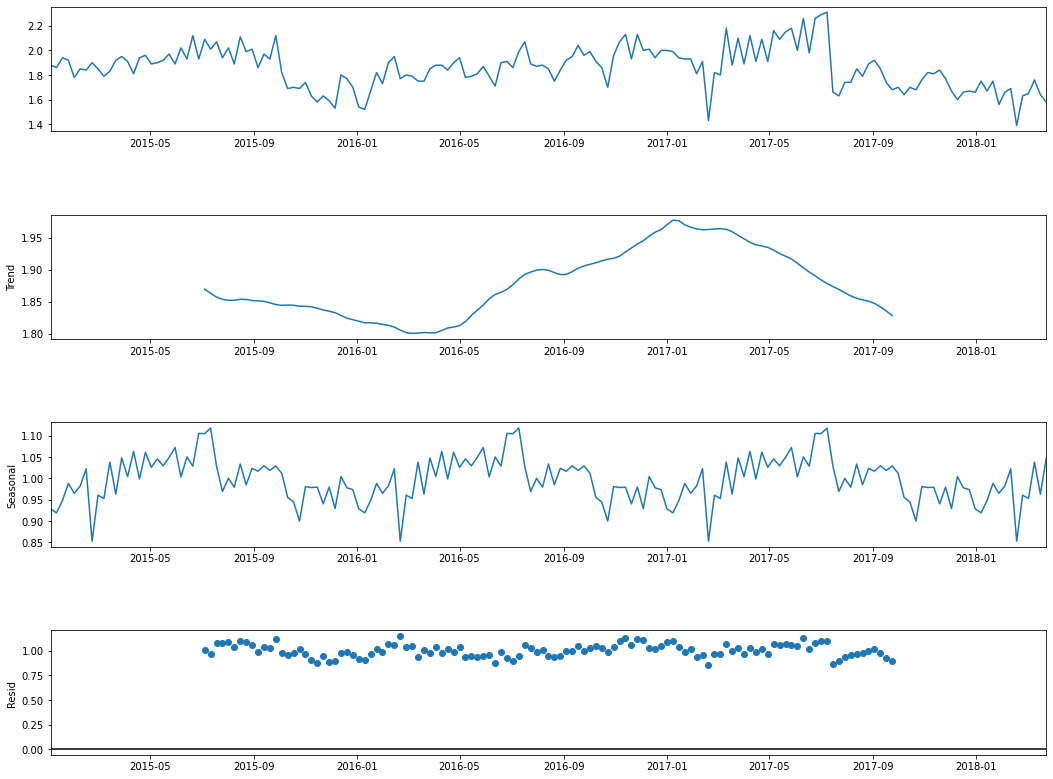

In [304]:
#Trực quan hóa
fig = result1.plot()
fig.set_size_inches(16, 12)
plt.show()

#### Nhận xét:
- Dữ liệu có xu hướng tăng từ tháng 5/2016 đến tháng 1/2017 và sau đó giảm dần đến tháng 9/2017
- Dữ liệu có xu hướng theo năm
- Dữ liệu phân bố tự nhiên độc lập

In [305]:
#Sử dụng auto_arima để tìm ra bộ thông số tối ưu - 'Seasonal' và theo tuần
stepwise_model1 = auto_arima(df_ar1, start_p=2, start_q=2,
                            max_p=5, max_q=5,m=52, start_P=1, seasonal=True, d=1, D=1)

In [306]:
print(stepwise_model1.aic())

-104.94392768281635


In [307]:
#Chia bộ dữ liệu train, test theo tỉ lệ 80:20
train_ar1, test_ar1 = df_ar1[0:int(len(df_ar1)*0.8)], df_ar1[int(len(df_ar1)*0.8):]

In [308]:
test_ar1.head()

,AveragePrice
Date,
2017-08-06,1.74
2017-08-13,1.85
2017-08-20,1.79
2017-08-27,1.89
2017-09-03,1.92


In [309]:
len(test_ar1)

34

In [310]:
#Huấn luyện model
stepwise_model1.fit(train_ar1)

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 52),
      suppress_warnings=True, with_intercept=False)

In [311]:
#Dự đoán kết quả
future_forecast1 = stepwise_model1.predict(n_periods=len(test_ar1))

In [312]:
future_forecast1

array([1.9220723 , 1.73996299, 1.67993512, 1.69010891, 1.8235113 ,
       1.7920175 , 1.8866824 , 1.83190612, 1.82202921, 1.68139405,
       1.68728651, 1.53526768, 1.76370468, 1.77699649, 1.82705454,
       1.68239814, 1.82651667, 1.70249079, 1.80953515, 1.73786878,
       1.76727798, 1.70969414, 1.70638984, 1.70972089, 1.7449715 ,
       1.70078   , 1.67772156, 1.747941  , 1.40465463, 1.65515748,
       1.63706702, 1.87518088, 1.69341919, 1.86084542])

In [313]:
#Chuyển thành DataFrame
future_forecast1 = pd.DataFrame(future_forecast1,index = test_ar1.index,columns=['Prediction'])
future_forecast1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2017-08-06 to 2018-03-25
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prediction  34 non-null     float64
dtypes: float64(1)
memory usage: 544.0 bytes


In [314]:
future_forecast1.head()

,Prediction
Date,
2017-08-06,1.92
2017-08-13,1.74
2017-08-20,1.68
2017-08-27,1.69
2017-09-03,1.82


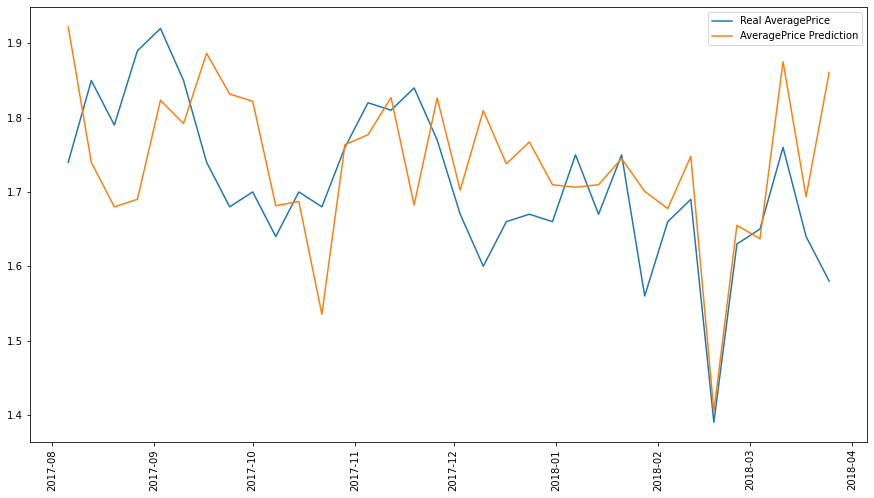

In [315]:
#Trực quan hóa so sánh giá trị thực và giá trị dự đoán của bộ test
plt.figure(figsize=(15,8))
plt.plot(test_ar1, label='Real AveragePrice')
plt.plot(future_forecast1, label='AveragePrice Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

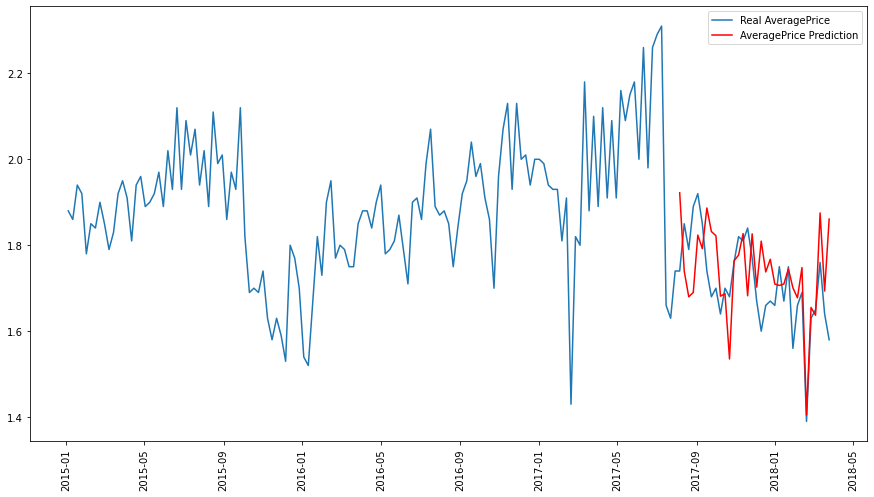

In [316]:
#Trực quan hóa toàn bộ dữ liệu với phần dự đoán
plt.figure(figsize=(15,8))
plt.plot(df_ar1, label='Real AveragePrice')
plt.plot(future_forecast1, label='AveragePrice Prediction',color='Red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [317]:
test_ar1.mean()[0]

1.7108823529411765

In [318]:
df_ar1.mean()[0]

1.8594082840236688

In [319]:
#Tính MAE
mae1 = mean_absolute_error(test_ar1, future_forecast1[0:len(test_ar1)])
print('MAE: %.3f' %mae1)
print('Sai số của MAE so với dữ liệu test:', round(mae1/test_ar1.mean()[0]*100,2),'%')
print('Sai số của MAE so với all data:', round(mae1/df_ar1.mean()[0]*100,2),'%')

MAE: 0.086
Sai số của MAE so với dữ liệu test: 5.03 %
Sai số của MAE so với all data: 4.63 %


In [320]:
#Tính MAE
rmse1 = sqrt(mean_squared_error(test_ar1, future_forecast1[0:len(test_ar1)]))
print('RMSE: %.3f' %rmse)
print('Sai số của RMSE so với dữ liệu test:', round(rmse1/test_ar1.mean()[0]*100,2),'%')
print('Sai số của RMSE so với all data:', round(rmse1/df_ar1.mean()[0]*100,2),'%')

RMSE: 0.152
Sai số của RMSE so với dữ liệu test: 6.41 %
Sai số của RMSE so với all data: 5.89 %


#### Nhận xét:
- So với mean_test = 1.710, mae và rmse tính ra là 5.03% và 6.41%, nhỏ hơn nhiều so với các giá trị tính theo prophet.  
- So với mean all data = 1.859, mae và rmse tính ra là 4.63% và 5.89%, nhỏ hơn nhiều so với các giá trị tính theo prophet.  
- Ta thấy sai số của mae và rmse khi tính theo ARIMA thì nhỏ hơn nhiều so với theo prophet. Tổng thể thì sai số mae và rmse theo arima là nhỏ. Vì vậy ta có thể sử dụng model theo ARIMA sẽ chính xác hơn để dự đoán các giá trị tương lai.

In [321]:
#Dự đoán cho 16 tuần tiếp theo
future_forecast_new1 = stepwise_model1.predict(n_periods=len(test_ar1)+16) #34 tuần + 16 tuần cần dự đoán
future_forecast_new1

array([1.9220723 , 1.73996299, 1.67993512, 1.69010891, 1.8235113 ,
       1.7920175 , 1.8866824 , 1.83190612, 1.82202921, 1.68139405,
       1.68728651, 1.53526768, 1.76370468, 1.77699649, 1.82705454,
       1.68239814, 1.82651667, 1.70249079, 1.80953515, 1.73786878,
       1.76727798, 1.70969414, 1.70638984, 1.70972089, 1.7449715 ,
       1.70078   , 1.67772156, 1.747941  , 1.40465463, 1.65515748,
       1.63706702, 1.87518088, 1.69341919, 1.86084542, 1.72968684,
       1.86581375, 1.73615454, 1.86794697, 1.75441983, 1.87814673,
       1.83849161, 1.88673368, 1.91269036, 1.79016609, 1.9305846 ,
       1.81472338, 1.97849143, 2.00319317, 2.03894589, 1.64229403])

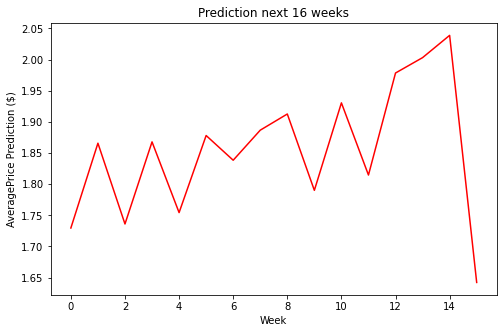

In [322]:
#Trực quan hóa xem dự đoán của các tuần trong tương lai
plt.figure(figsize=(8,5))
plt.plot(future_forecast_new1[len(test_ar1):], color='red')
plt.xlabel('Week')
plt.ylabel('AveragePrice Prediction ($)')
plt.title('Prediction next 16 weeks')
plt.show()